In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from IPython.display import Image

# Supress some warnings due to deprecation
import warnings
warnings.filterwarnings('ignore')

# This is the color scheme I use throughout the CV
CV_COLORS = ['#cc99ff', '#ff99cc', '#ffcc99', '#ffff99', '#ccffcc', '#ccffff', '#99ccff']

# Curriculum Vitae
## About me

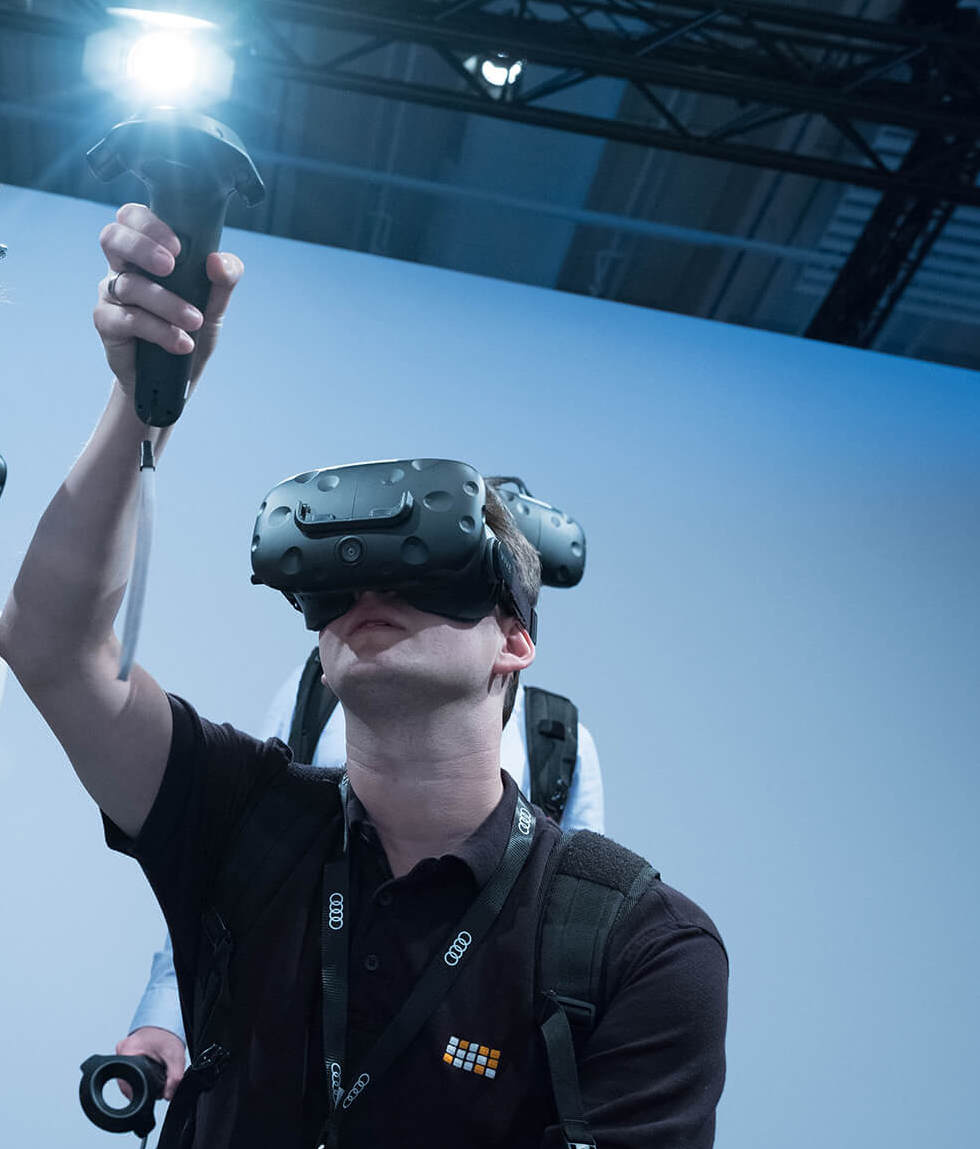

In [2]:
Image(filename='images/vr_experience.JPG') 

# Job Experience

In [3]:
# I've downloaded a shapefile of germany from
# https://gdz.bkg.bund.de/index.php/default/digitale-geodaten/verwaltungsgebiete/verwaltungsgebiete-1-1-000-000-ebenen-stand-01-01-vg1000-ebenen-01-01.html

germany_gdf = gpd.read_file("./data/VG1000_LAN.shp")

# convert coordinates from Gauss-Krueger to UMT
UMT_EPSG = 25832
germany_gdf['geometry'] = germany_gdf['geometry'].to_crs(UMT_EPSG)

<Axes: >

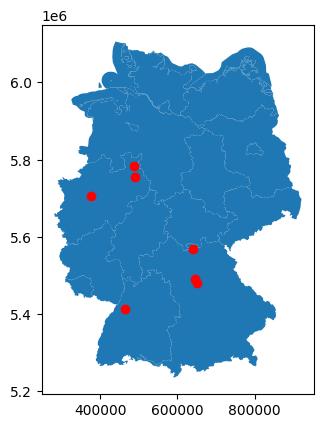

In [4]:
# TODO: put into database
cities = {  "Bad Oeynhausen":
              { "latitude":5783462, "longitude":486203},
            "Detmold":
              { "latitude":5754203, "longitude":490969},
            "Coburg":
              { "latitude":5569899, "longitude":640502},
            "Bochum":
              { "latitude":5704909, "longitude":376377},
            "Karlsbad":
               { "latitude":5414315, "longitude":463944},
            "Nürnberg":
               { "latitude":5479986, "longitude":650548},
             "Erlangen - Tennenlohe":
               { "latitude":5490337, "longitude":646549}
          }

cities_df = pd.DataFrame.from_dict(cities, orient='index')
from shapely.geometry import Point
cities_df["geometry"] = cities_df.apply (lambda row: Point(row.longitude,row.latitude), axis=1)
city_gdf = gpd.GeoDataFrame(cities_df, geometry=cities_df.geometry)


ax = germany_gdf.plot()
city_gdf.plot(ax=ax, color="r")

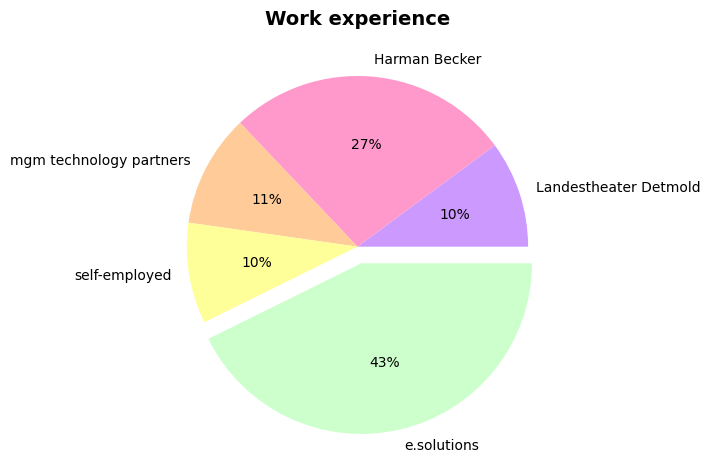

In [5]:
jobs = pd.read_csv('./data/jobs.csv')
explode = (0, 0, 0, 0, 0.1)
pie = jobs.plot.pie(y='Duration / Month', explode=explode, labels=jobs['Employer'], colors=CV_COLORS, autopct='%1.0f%%')
pie.get_legend().remove()
plt.title('Work experience', weight='bold', size=14)
plt.ylabel("")
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

# Skills and Competency

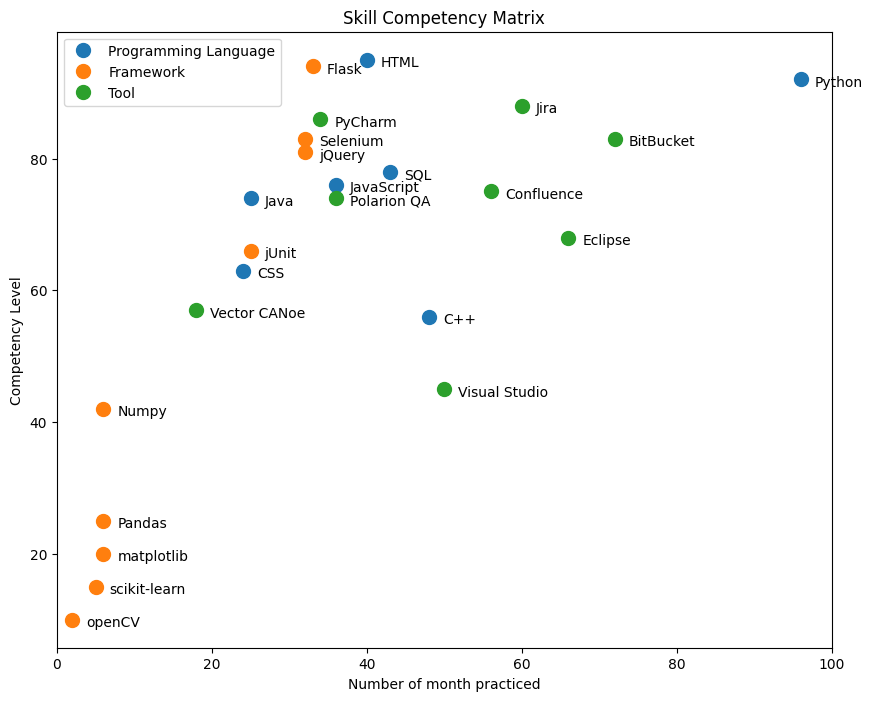

In [6]:
skills = pd.read_csv('./data/skills.csv')


groups = ["Programming Language", "Framework", "Tool"]
fig, ax = plt.subplots()
fig.set_size_inches(10, 8) 

for group in groups:
    skill = skills[skills.Type == group]
    ax.plot(skill['Number of month practiced'], 
            skill['Competency Level'], 
            marker='o', 
            linestyle='', 
            ms=10, 
            label=group)
    for i, txt in enumerate(skill.Skill):
        ax.annotate(txt, (skill['Number of month practiced'].iat[i],
                          skill['Competency Level'].iat[i]), 
                    xytext=(10,-5), 
                    textcoords='offset points',)
ax.legend()
ax.set_xlim(0, 100)
plt.xlabel('Number of month practiced')
plt.ylabel('Competency Level')
plt.title("Skill Competency Matrix")
plt.show()